# Mortality Caused by Heart Failure

In 2022 heart disease was the number 1 cause of death in the United States.

According to the [CDC](https://www.cdc.gov/heart-disease/data-research/facts-stats/index.html): 

- Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups[$ ^1$](https://wonder.cdc.gov/mcd.html)
- One person dies every 33 seconds from cardiovascular disease[$ ^1$](https://wonder.cdc.gov/mcd.html)
- In the United States, someone has a heart attack every 40 seconds.[$ ^2$](https://pubmed.ncbi.nlm.nih.gov/36695182/)
  

## Questions 

This project focuses on answering the following questions:

1. Does the risk of mortality increase with different CVD's?

2. What risk factors (varaibles) have more influence in predicting mortality caused by heart failure?

## Understanding the Dataset

#### This dataset contains 12 variables that can be used to predict mortality by heart failure

Independent Variables: 
- Age: age of the patient (years)
- Anaemia: decrease of red blood cells or hemoglobin (boolean)
- High blood pressure: if the patient has hypertension (boolean)
- Creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- Ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- Gender: woman or man (binary)
- Serum creatinine: level of serum creatinine in the blood (mg/dL)
- Serum sodium: level of serum sodium in the blood (mEq/L)
- Smoking: if the patient smokes or not (boolean)
- Platelets: platelets in the blood (kilo platelets/mL)
- Diabetes: if the patient has diabetes (boolean)

Dependent Variable:
- Death event: if the patient died during the follow-up period (boolean)

Dataset utilized is from [Kaggle](https://www.kaggle.com/datasets/whenamancodes/heart-failure-clinical-records/data).

## Loading Libraries & Dataset

In [12]:
# Loading libraries 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


In [14]:
heart_failure = pd.read_csv('heart_failure.csv')
heart_failure.rename(columns={'sex': 'gender'}, inplace=True)
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [16]:
print(heart_failure.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'gender', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [167]:
heart_failure = heart_failure.drop_duplicates()
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   gender                    299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [112]:
heart_failure.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
gender                      0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [169]:
# Time is a variable I am not focusing on in this data set.
heart_failure = heart_failure.drop(['time'], axis=1)

# Exploratory Data Analysis

In [171]:
# Taking a closer look at the data to get the total amount of patients, age range, and mean age
heart_failure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


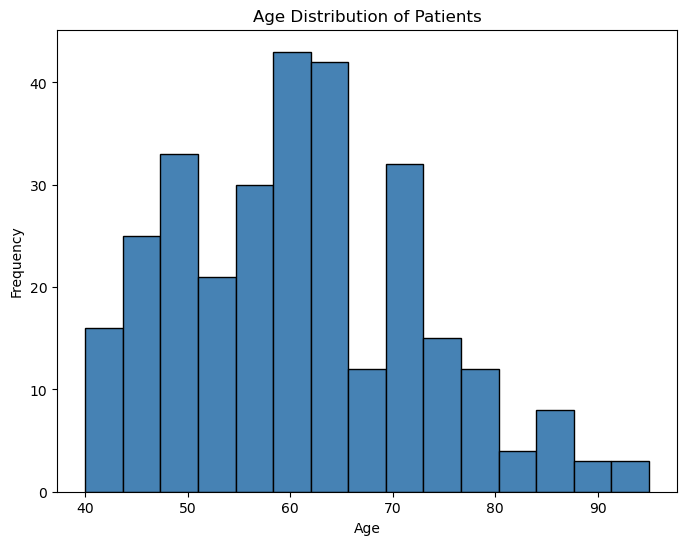

In [173]:
#Visual for age distribution of patients
plt.figure(figsize=(8,6))
plt.hist(heart_failure['age'], bins=15, color='steelblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In the data set: 
- There are a total of 299 patients
- The age ranges from 40 to 95 years old
- The mean age is 61 years old


In [177]:
#Gender distribution in this data set
gender_distribution = heart_failure['gender'].value_counts()
gender_distribution

gender
1    194
0    105
Name: count, dtype: int64

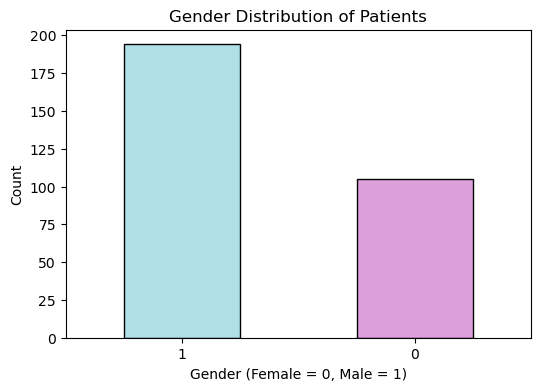

In [179]:
#Gender distribution visual
plt.figure(figsize=(6,4))
gender_distribution.plot(kind='bar', color=['powderblue', 'plum'], edgecolor='black')
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender (Female = 0, Male = 1)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

In this data set there is a total of 194 male patients and 105 female patients.

In [181]:
#Survival rate in data set
heart_failure['DEATH_EVENT'].value_counts(normalize=True)

DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64

Text(0, 0.5, 'Count')

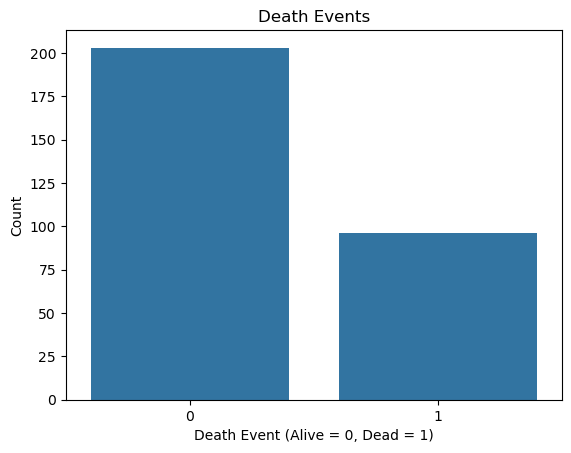

In [183]:
sns.countplot(heart_failure, x = 'DEATH_EVENT')

plt.title('Death Events')
plt.xlabel('Death Event (Alive = 0, Dead = 1)')
plt.ylabel('Count')


- In the data set 67.89 % of the patients survived while 32.11 % of the patients passed away.

- The dataset is skewed towards non-deaths, with about two-thirds of the patients surviving and one-third experiencing a death event.


#### Q1: Does the risk of mortality increase with different CVD's?

In [185]:
#How many people with diabetes passed away?
counts = heart_failure.groupby(['DEATH_EVENT', 'diabetes']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
print("Counts:")
print(counts)
print("\nPercentages:")
print(percentages)


Counts:
diabetes       0   1
DEATH_EVENT         
0            118  85
1             56  40

Percentages:
diabetes             0          1
DEATH_EVENT                      
0            58.128079  41.871921
1            58.333333  41.666667


Text(0, 0.5, 'Number of Patients')

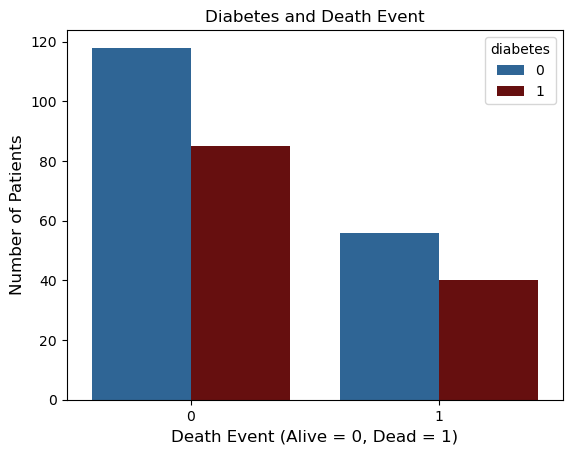

In [187]:
sns.countplot(heart_failure, x= 'DEATH_EVENT', hue= 'diabetes', palette=['#1E66A6','#750000'])

plt.title('Diabetes and Death Event', fontsize=12)
plt.xlabel('Death Event (Alive = 0, Dead = 1)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

125 patients have diabetes, 32% of patients with diabetes passed away

In [189]:
#How many people with hypertension passed away?
counts = heart_failure.groupby(['DEATH_EVENT', 'high_blood_pressure']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
print("Counts:")
print(counts)
print("\nPercentages:")
print(percentages)

Counts:
high_blood_pressure    0   1
DEATH_EVENT                 
0                    137  66
1                     57  39

Percentages:
high_blood_pressure          0          1
DEATH_EVENT                              
0                    67.487685  32.512315
1                    59.375000  40.625000


Text(0, 0.5, 'Number of Patients')

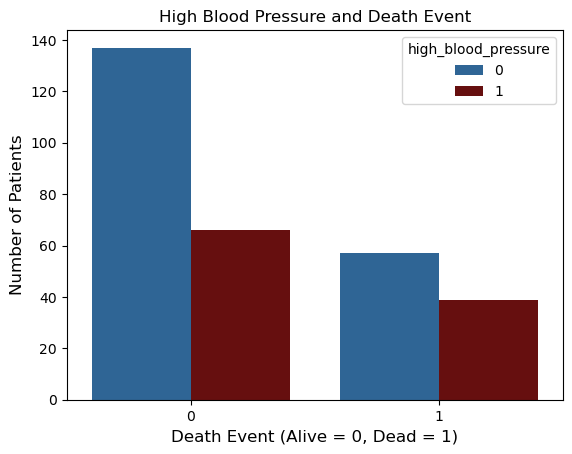

In [191]:
sns.countplot(heart_failure, x= 'DEATH_EVENT', hue= 'high_blood_pressure', palette=['#1E66A6','#750000'])

plt.title('High Blood Pressure and Death Event', fontsize=12)
plt.xlabel('Death Event (Alive = 0, Dead = 1)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

105 patients have hypertension, 37% of patients with hypertension passed away

In [193]:
#Patients who had both CVDs
counts = heart_failure.groupby(['diabetes', 'high_blood_pressure']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
print("Counts:")
print(counts)


Counts:
high_blood_pressure    0   1
diabetes                    
0                    112  62
1                     82  43


In [195]:
#Total number of patients with both CVDs
total_diabetes_high = heart_failure[(heart_failure['diabetes'] == 1) & 
                                            (heart_failure['high_blood_pressure'] == 1)].shape[0]
total_diabetes_high

43

In [197]:
#Patients who passed away with both CVDs
death_diabetes_high = heart_failure[(heart_failure['diabetes'] == 1) & 
                                                  (heart_failure['high_blood_pressure'] == 1) & 
                                                  (heart_failure['DEATH_EVENT'] == 1)].shape[0]
death_diabetes_high

17

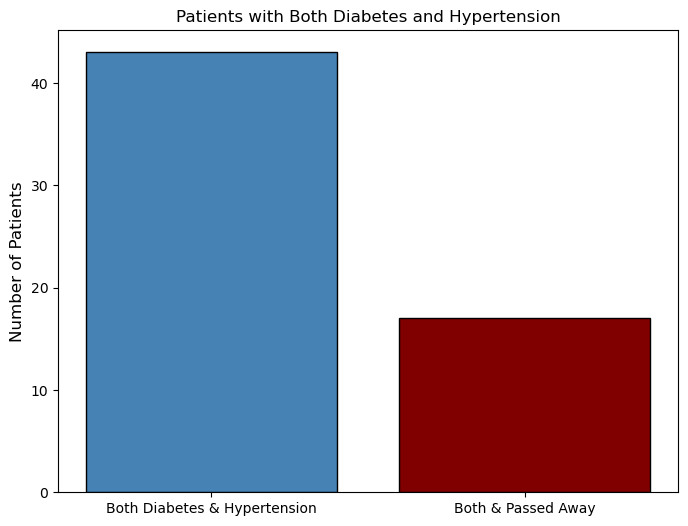

In [199]:
labels = ['Both Diabetes & Hypertension', 'Both & Passed Away']
values = [total_diabetes_high, death_diabetes_high]

plt.figure(figsize=(8,6))
plt.bar(labels, values, color=['steelblue', 'maroon'], edgecolor='black')
plt.title('Patients with Both Diabetes and Hypertension', fontsize = 12)
plt.ylabel('Number of Patients', fontsize = 12)
plt.show()


43 patients have both diabetes and hypertension, 39% of patients with both passed away

# Logistic Regression

#### Q2: What risk factors (variables) have more influence in predicting death caused by heart failure?

I am using logistic regression to understand how each risk factor plays into whether a patient will pass away or not.


In [44]:
#Running my logistic regression
y = heart_failure['DEATH_EVENT']

# Predictors
X = heart_failure[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'gender', 'smoking']]

#Training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Fitting the model
logreg =  LogisticRegression() 
logreg.fit(X_train_scaled, y_train)


# Getting parameters
print('Original coefficients: ')
print(logreg.intercept_, logreg.coef_)

# Exps:
print('Exponentiated coefficients: ')
print(np.exp(logreg.intercept_), np.exp(logreg.coef_))

Original coefficients: 
[-0.9603511] [[ 0.68532964  0.10389607  0.26824117  0.01060951 -0.85975493  0.23556383
  -0.06747849  0.673231   -0.15945695 -0.21869228 -0.02736957]]
Exponentiated coefficients: 
[0.38275848] [[1.98442587 1.10948514 1.30766247 1.01066599 0.4232658  1.26562216
  0.93474782 1.96056168 0.85260667 0.80356895 0.97300158]]


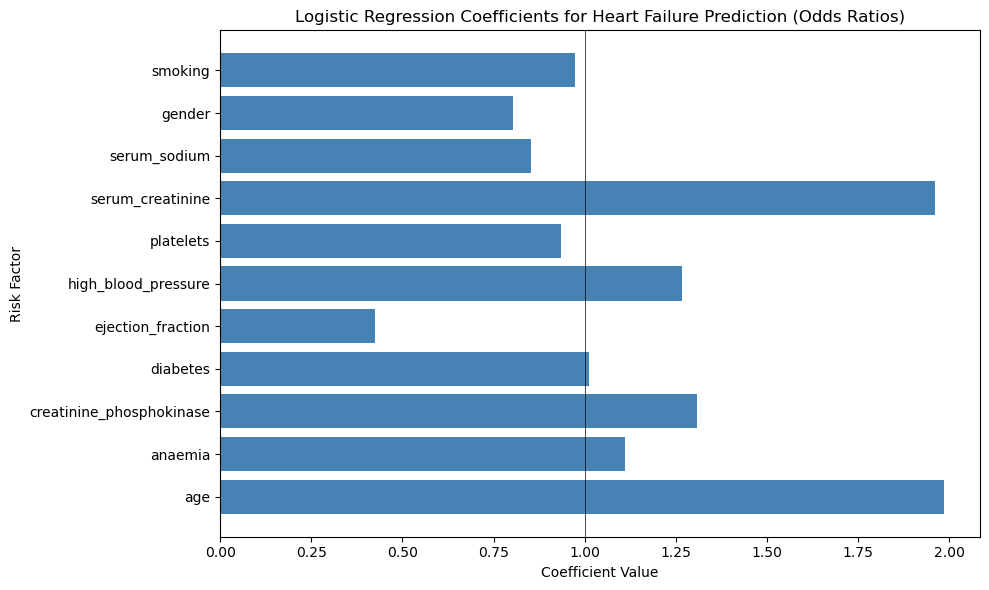

In [231]:
#Plotting the Logistic Regression Coefficient 
feature_names = X.columns
coefficients = np.exp(logreg.coef_)[0]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Risk Factor')
plt.title('Logistic Regression Coefficients for Heart Failure Prediction (Odds Ratios)')
plt.axvline(0, color='black', linewidth=0.5)
plt.axvline(1, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

Interpretation of the exponentiated coefficients (odds ratio) :

- For every additional year in age, the odds of death increase by 98%.
- For each unit increase in  serum creatinine levels the odds of death increase by 96%
- High blood pressure increases the odds of death by 27%.
- For each unit increase in CPK, the odds of death increase by 31%.
- Being male reduces the odds of death by 20%
- For each unit increase in ejection fraction, the odds of death decrease by 58%..


## Evaluating Performance

In [69]:
#Linear Discriminant Analysis

# Target variable
y = heart_failure['DEATH_EVENT']

# Predictors
X = heart_failure[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'gender', 'smoking']]

# Loading the model, please understand the choice of solver + iter
logreg =  LogisticRegression(solver='lbfgs', max_iter=10000)

# Fitting the models
logreg.fit(X, y)


LogisticRegression(max_iter=10000)

In [59]:
#Confusion Matrix
y_pred_logreg = logreg.predict(X)

# Logistic Regression
print(confusion_matrix(y, y_pred_logreg))

[[183  20]
 [ 51  45]]


In [67]:
#Confusion Matrix

# Predictions
y_pred_logreg = logreg.predict(X)
y_pred_ldan = ldan.predict(X)

# Logistic Regression
print(confusion_matrix(y, y_pred_logreg))

[[183  20]
 [ 51  45]]


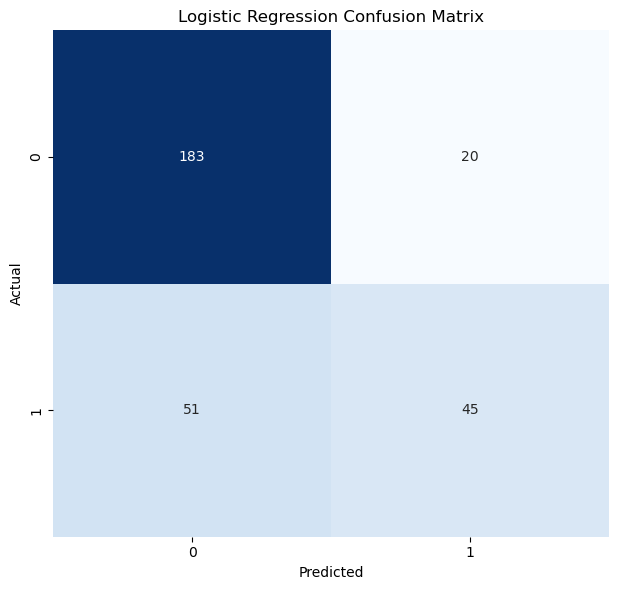

In [65]:
# Confusion matrices for both models
cm_logreg = confusion_matrix(y, y_pred_logreg)
cm_ldan = confusion_matrix(y, y_pred_ldan)

# Plotting the confusion matrix for Logistic Regression
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

- True Negatives — The model correctly predicted 183 patients who survived (i.e., no death event).
- False Positives  — The model incorrectly predicted that 20 patients would die, but they survived.
- False Negatives — The model incorrectly predicted that 51 patients would survive, but they actually died.
- True Positives — The model correctly predicted 45 patients who passed away.


In [251]:
y.value_counts(normalize = True)

DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64

67% of the dataset instances are labeled as no death (0), and 33% are labeled as death (1). This is shown to be an issue in the classification report below.

In [253]:
# Logistic Classification Report
print(classification_report(y, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       203
           1       0.69      0.47      0.56        96

    accuracy                           0.76       299
   macro avg       0.74      0.69      0.70       299
weighted avg       0.75      0.76      0.75       299



Interpreting the classification report :
- A f1-score of 0.84 means the model is doing well at identifying those who survived.
- The model correctly predicted the outcome (survived or died) for 76% of the patients.
- For patients who died (Class 1), the model has a good precision (69%), meaning that when it predicts death, it's usually correct. However, the low recall (47%) indicates that it misses a large portion of actual deaths.


## Conclusion

Q1: Does the risk of dying increase with different CVD’s?

Patients with high blood pressure have a higher risk of passing away than patients with diabetes.
If you have both high blood pressure and diabetes you are at higher risk of passing away.

Q2: What risk factors(variables) have more influence in predicting death caused by heart failure?

Age, serum creatinine levels,  high blood pressure, and creatinine phosphokinase (CPK) are significant variables to predict heart failure.

Improvements:
- Could have chosen a better data set as the model does not predict those who died as well as those who survived.
- P-value for certain variables, such as smoking, to assess the statistical significance of the predictor
- Explore a data set with more variables (ex. hyperlipidemia, obesity, excessive alcohol use)


## References

1. [National Center for Health Statistics](https://wonder.cdc.gov/mcd.html)
2. [A Report From the American Heart Association](https://pubmed.ncbi.nlm.nih.gov/36695182/)